# Beam with Genetic Algorithms

In [9]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from beam import Cantilever

In [69]:
L = 1000
loads = [16000, -30000]
matname = 'AL7010'
exr = -300 # €/kg, exchange rate

x0 = [0, 180, 3.2, 50, 6, 50, 6]

rfkeys = [
    'rf_t_uf', 
    'rf_t_lf',
    'rf_c_uf',
    'rf_c_lf',
    'rf_lb_uf',
    'rf_lb_lf',
    'rf_s_web',
    'rf_wb',
    'rf_lat',
]


def mass(x):
    b = Cantilever(matname, L, *x, dstab=dstab)
    return b.mass()

def cost(x):
    b = Cantilever(matname, L, *x, dstab=dstab)
    return b.cost()

def combined(x):
    b = Cantilever(matname, L, *x, dstab=dstab)
    return b.cost() - exr*b.mass()


In [84]:
#objective function, incl. penalty
rho_pen = 10 # penalty magitude, > 0
mats = ["AL7010", "AL2198", "TI64"]


def f(x):
    global CALLED
    b = Cantilever(mats[int(x[0])], L, *x[1:])
    result = b.analyse(loads)
    CALLED += 1
    value = result['mass']
    pcount = sum(result[k] < 1 for k in rfkeys)
    
    return result['mass'] + pcount * rho_pen
        

In [78]:
f(x0)

3.2080319999999998

 The best solution found:                                                                           
 [  1.00982081 235.08471577   3.71204336  21.08548121   9.17438378
  32.90946717   3.93739561]

 Objective function:
 3.0854220702874255


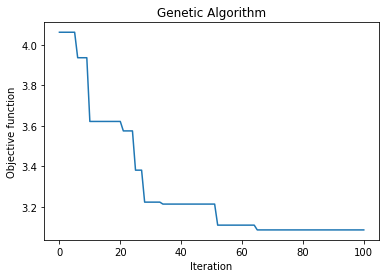

7100


In [88]:
# x: [h, tw, blf, tlf, buf, tuf]    
varbound = np.array([(0, 2), (50, 300), (1.5, 12), (6, 100), (1, 12), (6, 100), (1, 12)])
vartype=np.array([['int'] + ['real']*6])
algorithm_param = {'max_num_iteration': 100,
                   'population_size': 100,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

model=ga(function=f, 
         dimension=7, 
         variable_type='real', # FIXME: use variable_type_mixed!!! 
         variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

CALLED = 0
model.run()
print(CALLED)

In [81]:
xsol = model.best_variable
matname = mats[int(xsol[0])]
Cantilever(matname, L, *xsol[1:]).analyse(loads)

{'wmax': 19.250119073276547,
 'rf_t_uf': 1.0185212601705684,
 'rf_t_lf': 2.103214182856695,
 'rf_c_uf': 1.6545107647216455,
 'rf_c_lf': 1.0012128945677332,
 'rf_lb_uf': 2.5672407102391923,
 'rf_lb_lf': 7.0392806604992355,
 'rf_s_web': 4.198830011201194,
 'rf_wb': 1.0673866189246235,
 'rf_lat': 1.400373057395337,
 'Fmax': 30000,
 'mass': 3.0188880233532527,
 'cost': 625.6409848684348,
 'area': 1122.2632057075289,
 'L': 1000,
 'h': 211.274053578812,
 'tw': 3.4713547144725725,
 'blf': 40.05396495724619,
 'tlf': 6.104224410877583,
 'buf': 49.77031100879984,
 'tuf': 3.5756218835912197,
 'matname': 'AL2198'}

In [91]:
a = np.arange(4*10).reshape((4,10))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [95]:
b = np.arange(4).reshape((4, 1))
b

array([[0],
       [1],
       [2],
       [3]])

In [96]:
a*b

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 40,  42,  44,  46,  48,  50,  52,  54,  56,  58],
       [ 90,  93,  96,  99, 102, 105, 108, 111, 114, 117]])